# The EM Algorithm

In [1]:
from prereqs import *

now importing: 
1. numpy as np 
2. matplotlib.pyplot as plt
3. from scipy stats



## The EM Algorithm  


Given a random sample of size $n$, with observed sample $\mathbf{X} = (X_1, ..., X_m)$ and *missing* random sample $\mathbf{Z} = Z_{m+1}, ..., Z_n$ we seek to compute 
$$
\hat{\theta} = \text{ arg max } L(\theta | \mathbf{X}, \mathbf{Z}) 
$$
Although $\mathbf{Z}$ is unobservable, we assume that $(\bf{X, Z}) \sim f(\bf{x,z} | \theta)$.

We place a conditional distribion on $\mathbf{Z}$ given the observed data $\bf{x}$,
$$
k(\mathbf{z}| \theta, \mathbf{x}) = f( \mathbf{x, z} | \theta) / g(\mathbf{x} | \theta)
$$

Here we assume that that $\mathbf{X} \sim g(\bf{x} | \theta)$, where 
$$
g(\bf{x} | \theta) = \int f( \mathbf{x,z} | \theta ) d\bf{z}
$$




Denote the complete-data likelihood as $L^c(\theta | \mathbf{x, z})$ and the observed-data likelihood as $L(\theta | \mathbf{x} )$. Then, for any value of $\theta$, $\theta_i$

$$
log L(\theta | \mathbf{x}) = E[ log L^c(\theta | \mathbf{x, z}) ] - E [ log k( \bf{Z} | \theta_i, \bf{x} ) ]
$$
where the expectation is with respect to $k(\mathbf{z}| \theta_i, \bf{x})$. We can rewrite this as


$$
E[log L^c(\theta | \mathbf{x, z})] = log L(\theta | \mathbf{x}) +  E[log k(\mathbf{Z} | \theta_i, \bf{x})]
$$

where our focus is concerned with maximizing $E[log L^c(\theta | \mathbf{x, z})]$.





Denoting $E[log L^c(\theta | \mathbf{x, z})]$ = $Q(\theta | \theta_i, \mathbf{x})$, the EM algorith iterates through values of $\theta_i$ by maximizing $Q(\theta | \theta_i, \mathbf{x})$.

**The EM Algorithm**

`Pick a starting value` $\hat{\theta_0}$

`Then for i in 1:n do`

`1. Compute` (E-step)
$$
Q(\theta | \theta_{i-1}, \mathbf{x}) = E[log L^c(\theta | \mathbf{x, z})]
$$

`where the expectation is with respect to` $k( \bf{Z} | \theta_i, \bf{x} )$

`2. Maximize` $Q(\theta | \theta_{i-1}, \mathbf{x})$ `in` $\theta$ `and take`

$$
\hat{\theta_i} = \text{ arg max } Q(\theta | \theta_{i-1}, \mathbf{x})
$$

`repeat until convergence criteria is met`


## The First Exercise  

This exercise is taken from Flury and Zoppe, 2000, see [Exercises in EM](http://www.webpages.uidaho.edu/~stevel/565/literature/Exercise%20in%20EM.pdf).

Below is the setup for the first exercise.



There are two light bulb survival experiments. 

In the first, there are $N$ bulbs,  $y_1, ..., y_N$,  whose exact lifetimes are recorded. The lifetimes have an exponential distribution, such that $y_i \sim Exp(\theta).$ 

In the second experiment, there are $M$ bulbs, $x_1, ..., x_M$. After some time *t* > 0, a researcher walks into the room and only records how many lightbulbs are still burning out of $M$ bulbs. Depending on whether the lightbulbs are still burning or out, the results from the second experiment are right- or -left-censored. There are indicators $E_1, ..., E_M$ for each of the bulbs in the second experiment. If the bulb is still burning, $E_i = 1$, else $E_i = 0$.

Given this information, our task is to solve for an MLE estimator for $\theta$.

Our first step in solving this is finding the joint likelihood for the observed and unobserved data (i.e. complete-data likelihood).




Let $X_1, ... , X_M$ be the (unobserved) lifetimes for the second experiment, and let $Z = \sum_{i=1}^ME_i$ be the number of light bulbs still burning. Thus, the observed data from both the experiments combined is $\mathcal{Y} = (Y_1, ..., Y_N, E_1,...,E_M)$ and the unobserserved data is $\mathcal{X} = (X_1, ..., X_M).$

> The complete data log-likelihood is obtained by

$$
\begin{aligned}
\displaystyle L(\theta| X,Y) & = \prod^N_{i=1} \frac{1}{\theta} e^{y_i/\theta} \times \prod^M_{i=1} \frac{1}{\theta} e^{x_i/\theta}   \\
\ & = \displaystyle \theta^{-N} e^{-N \bar{y} / \theta} \times \theta^{-M} e^{-\sum^M_{i=1} x_i / \theta }  \\
\end{aligned}
$$


## The First Exercise  

And log-likelihood is obtained by

$$
\begin{aligned}
log(L(\theta)) & = \displaystyle -N \times log(\theta) - N \bar{y}/\theta - M \times log(\theta) + \sum^M_{i=1} x_i / \theta  \\
\ & = \displaystyle -N ( log(\theta) + \bar{y}/\theta ) - M \times log(\theta) + \sum^M_{i=1} x_i / \theta  \\
\end{aligned}
$$

Or as written by Flury and Zoppe,

$$
log^c(L(\theta|\mathcal{Y,X})) = -N(log(\theta) + \bar{Y}/\theta) - \sum_{i=1}^M(log(\theta) + X_i/\theta ) \tag{1}
$$ 


## The First Exercise  


The next step, is to take the expectation of $log(L(\theta))$ with respect to observed data.

$$
\begin{aligned}
E[log(L(\theta)) | \mathcal{Y},\mathcal{X}] & = E[-N(log(\theta) + \bar{Y}/\theta) - \sum_{i=1}^M(log(\theta) + X_i/\theta ) | \mathcal{Y},\mathcal{X}] \\
\ & = -N(log(\theta) + \bar{Y}/\theta) - E[\sum_{i=1}^M(log(\theta) + X_i/\theta ) | \mathcal{Y},\mathcal{X}]   \\
\ & = -N(log(\theta) + \bar{Y}/\theta) - M \times log(\theta) + E[\frac{1}{\theta}  \sum_{i=1}^M X_i | \mathcal{Y},\mathcal{X}]   \\
\ & = -N(log(\theta) + \bar{Y}/\theta) - M \times log(\theta) + \frac{1}{\theta} \sum_{i=1}^M E[X_i | \mathcal{Y},\mathcal{X}]   \\
\ & = -N(log(\theta) + \bar{Y}/\theta) - M \times log(\theta) + \frac{1}{\theta} \sum_{i=1}^M E[X_i | E_i]   \\
\end{aligned}
$$


> which is linear for unobserved $X_i$. But


$$
E[X_i | \mathcal{Y}] = E[X_i | E_i] = 
\begin{cases}
    t + \theta       & \quad \text{if } E_i = 1\\
    \theta - t \frac{e^{-t/\theta}}{1 - e^{-t/\theta}}  & \quad \text{if } E_i = 0  \tag{2} \\
  \end{cases} 
$$ 






For the first case, $E_i = 1$, so
$$
\begin{aligned}
E[x_i | x_i > t] & = E[x_i + t] \\
\ & = t + E[x_i] \\
\ & = t + \theta \\
\end{aligned}
$$

For the second case, $E_i = 0$, then
$$
\begin{aligned}
\displaystyle \int_0^t P(X_i > x | X_i < t) \ dx & = \int_0^t \frac{P(x < X_i < t)}{P(X_i < t)} \ dx \\
\end{aligned}
$$





For the denominator, we get
$$
\begin{aligned}
P(X_i < t) & = \int_0^t \frac{1}{\theta} e^{- x_i / \theta} dx \\
\ & = \frac{1}{\theta} (-\theta e^{- x_i / \theta}) |^t_0 \\
\ & = 1 - e^{- t / \theta}
\end{aligned}
$$

and for the numerator we obtain
$$
\begin{aligned}
P(x < X_i < t) & = \int_x^t \frac{1}{\theta} e^{- x_i / \theta} dx \\
\ & = \frac{1}{\theta} (-\theta e^{- x_i / \theta}) |^t_0 \\
\ & = e^{- x / \theta} - e^{- t / \theta}
\end{aligned}
$$


  



Altogether, we obtain
$$
\begin{aligned}
\displaystyle \int_0^t P(X_i > x | X_i < t) \ dx & = \int_0^t \frac{P(x < X_i < t)}{P(X_i < t)} \ dx \\
\ & = \displaystyle \int_0^t \frac{e^{- x / \theta} - e^{- t / \theta}}{(1 - e^{-t/\theta})} \ dx \\
\ & = \displaystyle \frac{1}{(1 - e^{-t/\theta})} \int_0^t (e^{- x / \theta} - e^{- t / \theta}) \ dx \\
\ & = \displaystyle \frac{1}{(1 - e^{-t/\theta})}  (\int_0^t e^{- x / \theta} - \int_0^te^{- t / \theta} \ dx) \\
\ & = \displaystyle \frac{1}{(1 - e^{-t/\theta})}  (\theta (1 - e^{-t/\theta}) - x\times e^{- t / \theta} |_0^t) \\
\ & = \displaystyle   \theta - t\times \frac{e^{- t / \theta}}{1 - e^{-t/\theta}}  \\
\end{aligned}
$$




In order to calculate EM esimates for $\theta$, we will plug in the expected values into the log-likelihood

$$
E[X_i | \mathcal{Y}] = E[X_i | E_i] = 
\begin{cases}
    t + \theta       & \quad \text{if } E_i = 1\\
    \theta - t \frac{e^{-t/\theta}}{1 - e^{-t/\theta}}  & \quad \text{if } E_i = 0\\
  \end{cases} 
$$




$$
\begin{aligned}
\log(L(\theta)) & = \displaystyle -N ( log(\theta) + \bar{y}/\theta ) - M \times log(\theta) + \sum^M_{i=1} x_i / \theta  \\
\ & = \displaystyle -N \times log(\theta) - N \bar{y}/\theta  - M \times log(\theta) + \sum^M_{i=1} x_i / \theta  \\
\ & = \displaystyle -( N + M)  \times log(\theta) - N \bar{y}/\theta + \sum^M_{i=1} x_i / \theta  \\
\ & = \displaystyle -( N + M)  \times log(\theta) - \frac{1}{\theta} (N \bar{y} + \sum^M_{i=1} x_i )  \\
\ & = -(N + M) log(\theta) - \frac{1}{\theta} \big[N \bar{Y} + Z ( t + \theta) + (M - Z) \big(\theta - t \times \frac{e^{- t / \theta}}{1 - e^{-t/\theta}} \big)\big] \\
\end{aligned}
$$






As we iterate through estimates of $\theta$, we will use conditioned estimates of $\theta$ given previous estimates of $\theta$. Such that the $j$th step consists of replacing $X_i$ in (1) by its expected value (2), using the current numerical parameter value $\theta^{(j-1)}$. 

$$
\log(L(\theta)) = -(N + M) log(\theta) - \frac{1}{\theta} [N \bar{Y} + Z ( t + \theta^{(j-1)}) + (M - Z) (\theta^{(j-1)} - t p^{(j-1)})] \tag{3}
$$


> where 

$$
p^{(j-1)} = \frac{e^{-t/\theta^{(j-1)}}}{1 - e^{-t/\theta^{(j-1)}}}
$$



## The First Exercise  


Once we take the derivative of the log-likelihood and set it to zero, we will come up with an estimate for $\theta$

$$
\begin{aligned}
\displaystyle
\frac{\mathrm d}{\mathrm d x} ln(L(\theta)) & = 0 \\
\ \displaystyle 0 & = -\frac{(N + M)}{\theta} + \frac{1}{\theta^2} \big[N \bar{Y} + Z ( t + \theta^{(j-1)}) + (M - Z) \big(\theta^{(j-1)} - t \times \frac{e^{- t / \theta^{(j-1)}}}{1 - e^{-t/\theta^{(j-1)}}} \big)\big]  \\
\ \displaystyle \frac{(N + M)}{\theta} & =  \frac{1}{\theta^2} \big[N \bar{Y} + Z ( t + \theta^{(j-1)}) + (M - Z) \big(\theta^{(j-1)} - t \times \frac{e^{- t / \theta^{(j-1)}}}{1 - e^{-t/\theta^{(j-1)}}} \big) \big] \\
\ \displaystyle \theta & =  \big[N \bar{Y} + Z ( t + \theta^{(j-1)}) + (M - Z) \big(\theta^{(j-1)} - t \times \frac{e^{- t / \theta^{(j-1)}}}{1 - e^{-t/\theta^{(j-1)}}} \big)\big] \ / \ (N+M) \\
\end{aligned}
$$




Thus, for each *j*th M-step, we will calculate

$$
\begin{aligned}
\theta^{(j)} & = f(\theta^{(j-1)}) \\
\ \displaystyle \theta & =  \big[N \bar{Y} + Z ( t + \theta^{(j-1)}) + (M - Z) \big(\theta^{(j-1)} - t \times \frac{e^{- t / \theta^{(j-1)}}}{1 - e^{-t/\theta^{(j-1)}}} \big)\big] \ / \ (N+M) \\
\end{aligned}
$$



In [2]:
np.random.seed(5678)
theta = 5 ## theta

t = 5 ## time cut off
N = 100 ## sample size of ex 1
M = 50 ## sample size of ex 2
y = np.random.exponential(size=N, scale = theta) ## first experiment
x = np.random.exponential(size=M, scale = theta) ## second experiment
x = np.sort(x)
E = np.int64(x > t)  ## 0 & 1

ybar = np.mean(y)
Z = np.sum(E)
t = 5

In [3]:
ybar

5.066172364533033

In [4]:
theta_j = 0.1
theta_jp1 = 0.5
for i in range(10):
    theta_j = theta_jp1
    p = (np.exp(-t/theta_j)/(1 - np.exp(-t/theta_j)))
    theta_jp1 = (N*ybar + Z*( t + theta_j) + (M-Z)*(theta_j - t*p) ) / (N+M)
    print(i, theta_jp1)

0 4.17740132763
1 4.95589783696
2 5.06975690426
3 5.08603680591
4 5.08835807946
5 5.08868893005
6 5.08873608351
7 5.08874280385
8 5.08874376164
9 5.08874389814


In [5]:
## compare results
print(theta_jp1) ## EM theta estimate
np.mean(y) ## compare against MLE from observed data
np.mean(np.concatenate((y, x))) ## compare against complete-data
## note, results will vary if you remove seed


5.08874389814


5.127762652795429

## EM Normal Example  

Suppose $X = (x_1, ..., x_n)^T$ is a random sample from $N(\mu,1).$ Let the observations be in order such that $x_1 < x_2 < ... < x_n$. 
Suppose that after time $c$, values are censored or missing, such that only $x_1, ..., x_m$ are observed, and $x_{m+1}, ..., x_n$ are unobserved. 
Then, $r = (n - m)$ would be the quantity missing. We will use the EM and MCEM algorithms to find approximations for $\mu$.
Let $Z = (x_{m+1}, ..., x_n)^T$.

First, construct the likelihood function.

$$
\begin{aligned}
L(\mu | x) & = \prod^m f(x_i | \mu, 1) \times \prod^r f(z_i | \mu, 1) \\
\ & = (2 \pi )^{-n/2} exp(-\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) \times exp(-\frac{1}{2} \sum_{i=1}^m (z_i - \mu)^2) \\
\ & \propto exp(-\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) \times exp(-\frac{1}{2} \sum_{i=1}^m (z_i - \mu)^2)
\end{aligned}
$$


## EM Normal Example  

The log-likelihood is then 

$$
ln(L(\mu | X)) = -\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) - \frac{1}{2} \sum_{i=1}^m (z_i - \mu)^2
$$

We now find the conditional expectation $E[z_i | X]$

$$
\begin{aligned}
E[z_i | X] & =  E[z_i | x > c] = \int_c^{\infty} \frac{P(x_i > x | x_i > c)}{P(x_i > c)}   \\
\ & = \mu + \sigma \frac{\phi(c - \mu)}{1 - \Phi(c - \mu)}
\end{aligned}
$$

For notes on this derivation, see [Truncated Normal Distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution#Moments)



## EM Normal Example  


$$
\begin{aligned}
Q(\mu | \mu_t) & = -\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) - \sum E[z_i | X] \\
\ & =   -\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) - \sum E[z | X] \\
\ & =   -\frac{1}{2} \sum_{i=1}^m (x_i - \mu)^2) - (n-m) E[z | X] \\
\end{aligned}
$$

The MLE for $\mu$ is then,

$$
\begin{aligned}
\mu_{t+1} & =  \frac{m \bar{x}}{n} + \frac{(n - m) E[z | X]}{n} \\
\ & = \frac{m \bar{x}}{n} + \frac{(n - m) (\mu_t)}{n} + \frac{(n-m) \phi(c - \mu_t)}{n \Phi(c-\mu_t)} \\
\end{aligned}
$$





In [6]:
np.random.seed(2345)
n = 100
mu = 4
sd = 1
x = np.random.normal(size=n, loc=mu, scale=sd) ## generate some data
c = 5 ## time cut off
w = x[x < c] ## obtain samples before time cut off
m = np.sum(x < c) ## number of observed samples
wbar = np.mean(w) ## observed mean
r = n - m ## difference in sample size

In [7]:
## EM Normal Example  
from scipy import stats
dnorm = stats.norm.pdf ## get density values
pnorm = stats.norm.cdf ## get tail probabilities

N = 200
mu_new = wbar
results = []
for i in range(N):
    results.append(mu_new)
    mu_old = mu_new
    mu_new = m*wbar/n + (r*mu_old/n) + (r/n)*sd*(dnorm(c - mu_old))/(1 - pnorm(c - mu_old))  ## r/n instead of 1/n

print(results[-1]) ## last value


4.0023998029


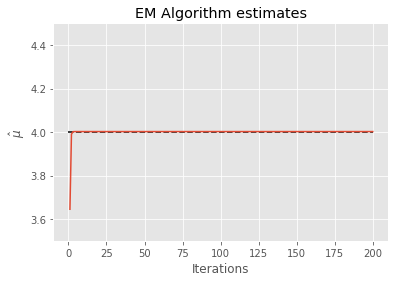

In [13]:
plt.hlines(xmin=0, xmax=N, y=mu, linestyles="--")
plot(range(1, N+1), results, ylim=(3.5, 4.5), 
     title = "EM Algorithm estimates", xlabel = "Iterations",
    ylabel = r"$\hat{\mu}$")

## Monte Carlo EM 

A MC flavor of the EM algorithm

1. Draw missing data sets $\mathbf{Z_1, Z_2, ..., Z_m} \sim f_{Z|X}(z | x, \theta_i)$ where each $\mathbf{Z_i}$ is a vector of all missing values needed to complete the observed data set $( \mathbf{X, Z} )$.

2. Calculate $\bar{Q}(\theta | \theta_{i-1}, X, \mathbf{Z_1, ..., Z_m}) = \frac{1}{m} \sum_{i=1}^m Q(\theta | \theta_{i-1}, X, \mathbf{Z_i} )$



## EM Normal Example | Monte Carlo EM 



In [14]:
np.random.seed(2345)
n = 100
mu = 4
sd = 1
x = np.random.normal(size = n, loc = mu, scale=sd)  #rnorm(n, mu, sd)
c = 5
w = x[x < c]
m = np.sum(x < c)
wbar = np.mean(w)
r = n - m


In [ ]:
M = 10
N = 100
mu_new = wbar
results = numeric(N)
for(i in 1:N){
    results[i] = mu_new
    mu_old = mu_new
    ## abs(N(0,1)) + mu_old + (c - mu_old) to *approximate*
    ## the truncated samples we need
    Z = matrix(data = (c - mu_old) + (mu_old +  abs(rnorm(n = r*M, mean = 0, sd = 1))), 
        nrow = r, ncol = M)
    mu_new = (m*wbar/n) + mean(colMeans(Z))*r/n
    M = M + 1
}

In [17]:
rnorm = np.random.normal
M = 10
N = 100 ## number of iterations
mu_new = wbar
results = []
for i in range(N):
    mu_old = mu_new
    ## abs(N(0,1)) + mu_old + (c - mu_old) to *approximate*
    ## the truncated samples we need
    Z = (c - mu_old) + (mu_old - np.abs(rnorm(size = (r, M), loc=0, scale=1)))
    mu_new = (m*wbar/n) + np.mean( np.mean(Z, axis=0))*r/n
    results.append(mu_new)
    M = M + 1

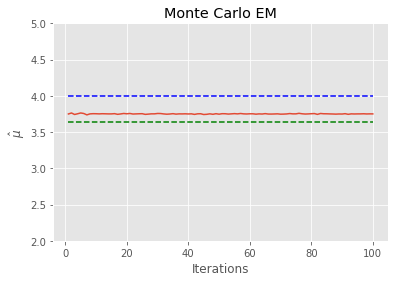

In [22]:
## EM Normal Example| Monte Carlo EM   
plt.hlines(xmin = 1, xmax=N, y = mu, linestyles="--", colors='blue')
plt.hlines(xmin = 1, xmax=N, y = wbar, linestyles="--", colors='green')
plot(x = range(1, N+1), y = results, xlabel = "Iterations",
     title = "Monte Carlo EM", ylabel = r"$\hat{\mu}$", ylim = (2, 5))



MC EM estimates lie closer to true theoretical value than simple MLE estimates